In [1]:
from pydub import AudioSegment
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import sounddevice as sd

In [3]:
duration = 3     # Duration of the signal in seconds
sample_rate = 44100  # Sample rate in Hz
print("Recording...")
audio_data = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float64')
sd.wait()  # Wait until recording is finished
print("Recording finished.")

Recording...
Recording finished.


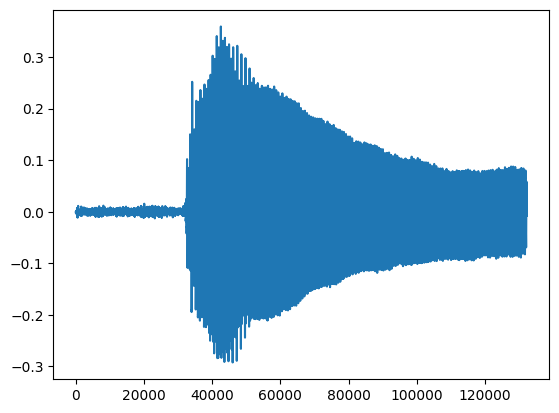

In [4]:
plt.plot(audio_data)

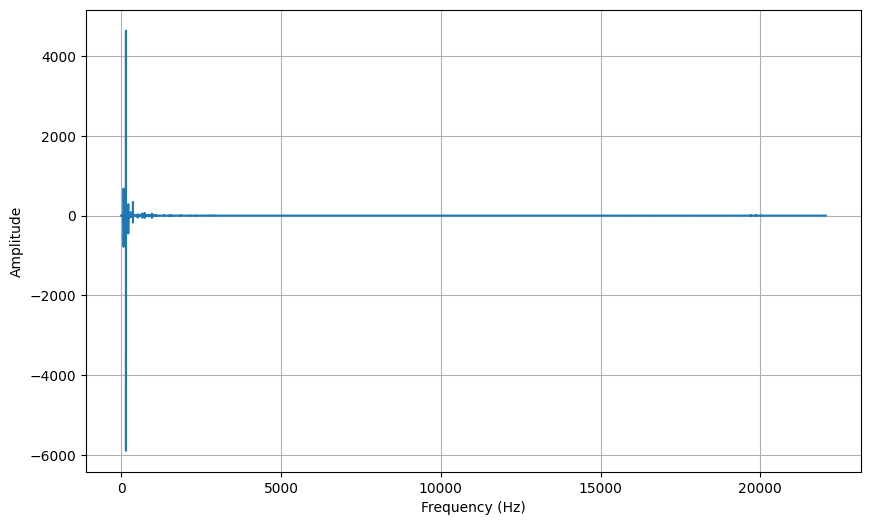

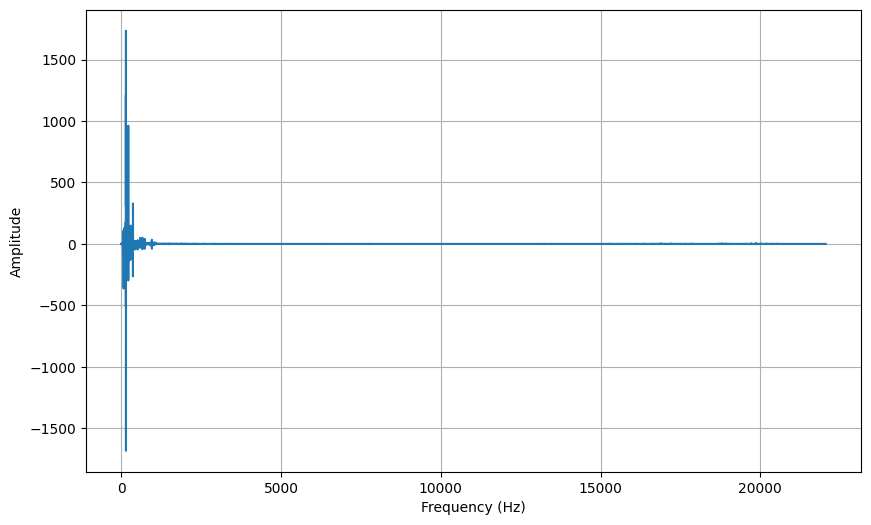

In [5]:
n = len(audio_data)  # Number of samples
yf = fft(audio_data.flatten())[:n // 2]  # Fourier Transform
xf = fftfreq(n, 1 / sample_rate)[:n // 2]  # Frequency bins

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(xf, yf.real)  # Plot positive frequencies only
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(xf, yf.imag)  # Plot positive frequencies only
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


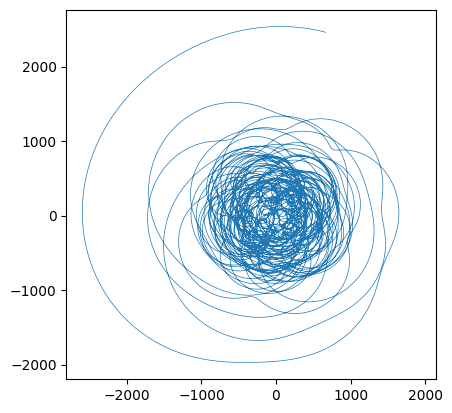

In [44]:
r = np.abs(yf)
theta = np.angle(yf)

i_sort = np.argsort(r)[::-1]
r_sort = r[i_sort]
omega_sort = xf[i_sort]
theta_sort = theta[i_sort]

duration = 0.5
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
num_circles = 100
x = 0
y = 0
for i in range(num_circles):
    x += r_sort[i] * np.cos(2*np.pi*omega_sort[i]*t + theta_sort[i])
    y += r_sort[i] * np.sin(2*np.pi*omega_sort[i]*t + theta_sort[i])
plt.plot(x, y, linewidth=0.5)
plt.axis('square')
plt.show()